# Plot wavelet family results

In [99]:
import os
import scipy.io as sio
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sciplotlib.style as splstyle

In [55]:
wavelet_data = sio.loadmat('wavelet_tensor.mat')['wavelet_tensor']
# wavelet_matrix = np.reshape(wavelet_data.T, 
 #                            (-1, np.shape(wavelet_data)[2]),
#                            order='')
wavelet_matrix = sio.loadmat('wavelet_matrix.mat')['wavelet_matrix']
wavelet_pca = sio.loadmat('wavelet_two_PCA.mat')['wavelet_two_PCA']

# wavelet_scores = 
wavelet_names = ['bior1.5', 'bior1.3', 'bior2.2', 'bior2.4',
              'db2', 'db3', 'db4', 'db5', 
              'cmor1.5-1', 'cgau3', 'mexh', 'haar']

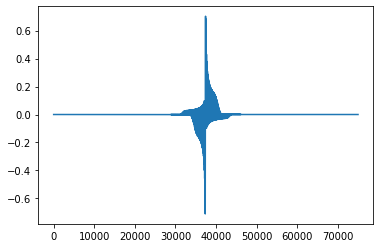

In [26]:
fig, ax = plt.subplots()
ax.plot(wavelet_matrix[:, 0])

In [79]:
np.shape(wavelet_data)

(75, 1000, 12)

### Plot example wavelets given particular scale

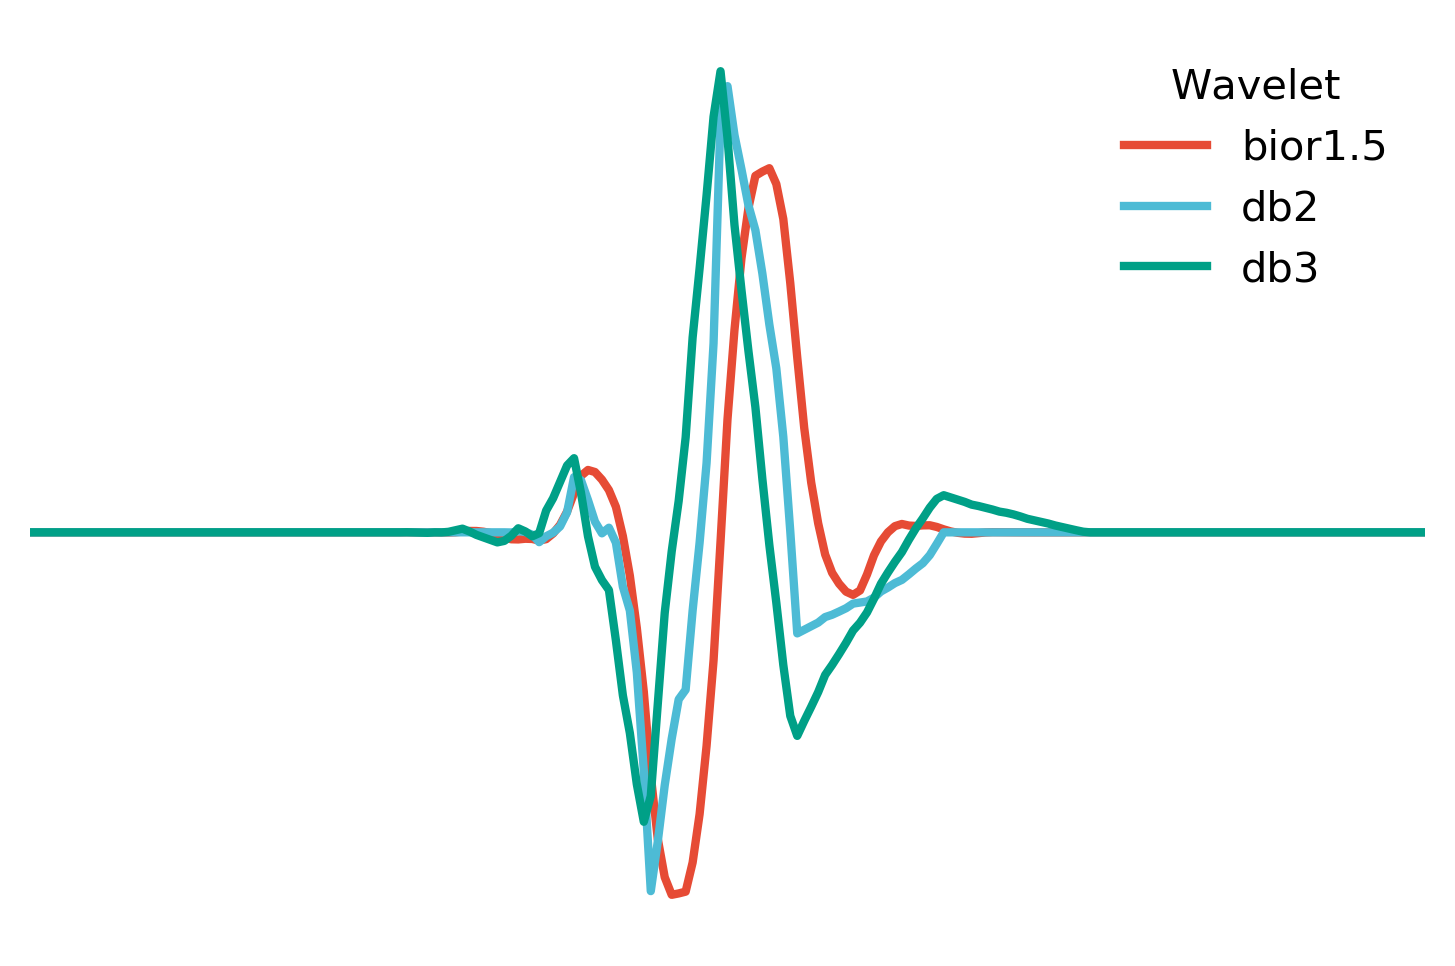

In [101]:
with plt.style.context(splstyle.get_style('nature-reviews')):
    scale_to_plot = 20
    fig, ax = plt.subplots()
    ax.plot(wavelet_data[scale_to_plot, :, 0],
           label='bior1.5')
    
    ax.plot(wavelet_data[scale_to_plot, :, 4],
           label='db2')
    
    ax.plot(wavelet_data[scale_to_plot, :, 5],
           label='db3')
    
    ax.set_xlim([400, 600])
    
    ax.legend(title='Wavelet')
    
    plt.axis('off')
    
    fig_folder = '/home/timsit/mecp2/figures/multiwavelet-detection/'
    fig_name = 'example_wavelets.png'
    
    fig.savefig(os.path.join(fig_folder, fig_name),
               dpi=300, bbox_inches='tight')

In [30]:
wavelet_corr = pd.DataFrame(wavelet_matrix).corr()

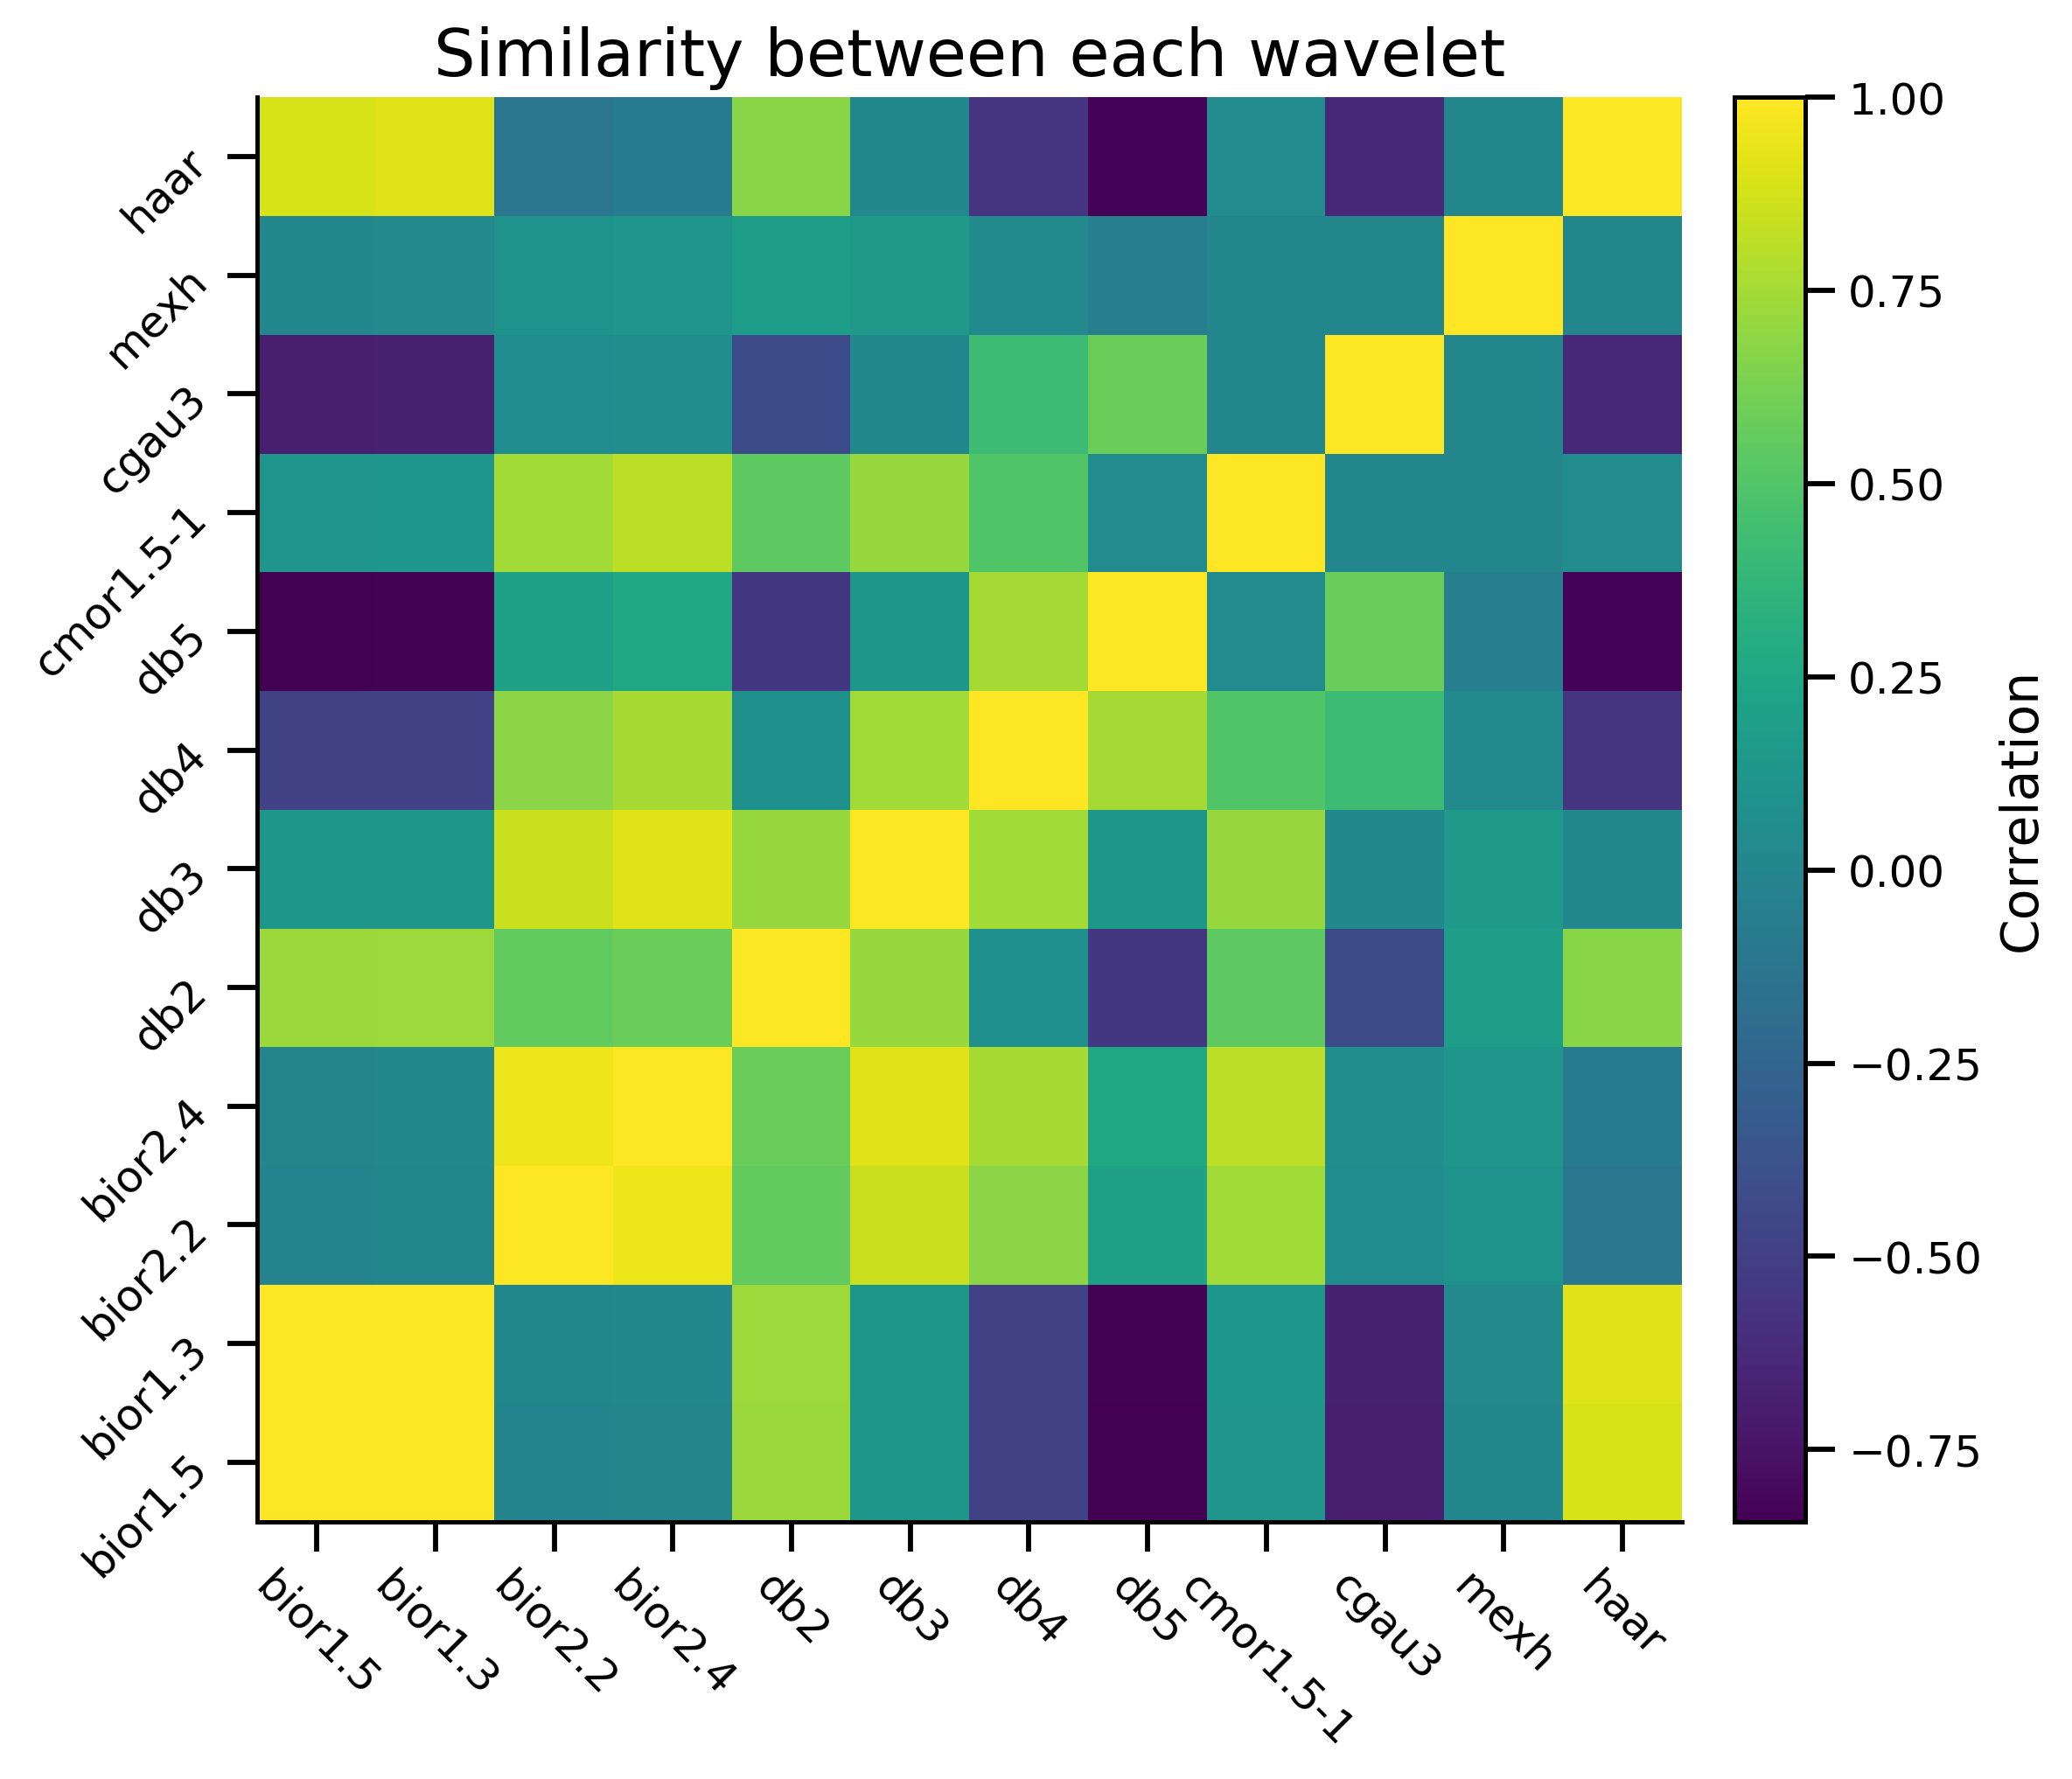

In [102]:
with plt.style.context(splstyle.get_style('nature-reviews')):
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    im = ax.imshow(wavelet_corr)
    
    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.2)
    cbar = fig.colorbar(im, cax=cax)
    cax.set_ylabel('Correlation')
    
    ax.set_xticks(np.arange(len(wavelet_names)+1))
    ax.set_yticks(np.arange(len(wavelet_names)+1))
    
    ax.set_xticklabels(wavelet_names, rotation=-45)
    ax.set_yticklabels(wavelet_names, rotation=45)
    
    ax.set_xlim([-0.5, len(wavelet_names) - 0.5])
    ax.set_ylim([-0.5, len(wavelet_names) - 0.5])
    
    ax.set_title('Similarity between each wavelet')
    
    fig.tight_layout()
    
    
    fig_folder = '/home/timsit/mecp2/figures/multiwavelet-detection/'
    fig_name = 'wavelet_correlations.png'
    
    fig.savefig(os.path.join(fig_folder, fig_name),
           dpi=300, bbox_inches='tight')

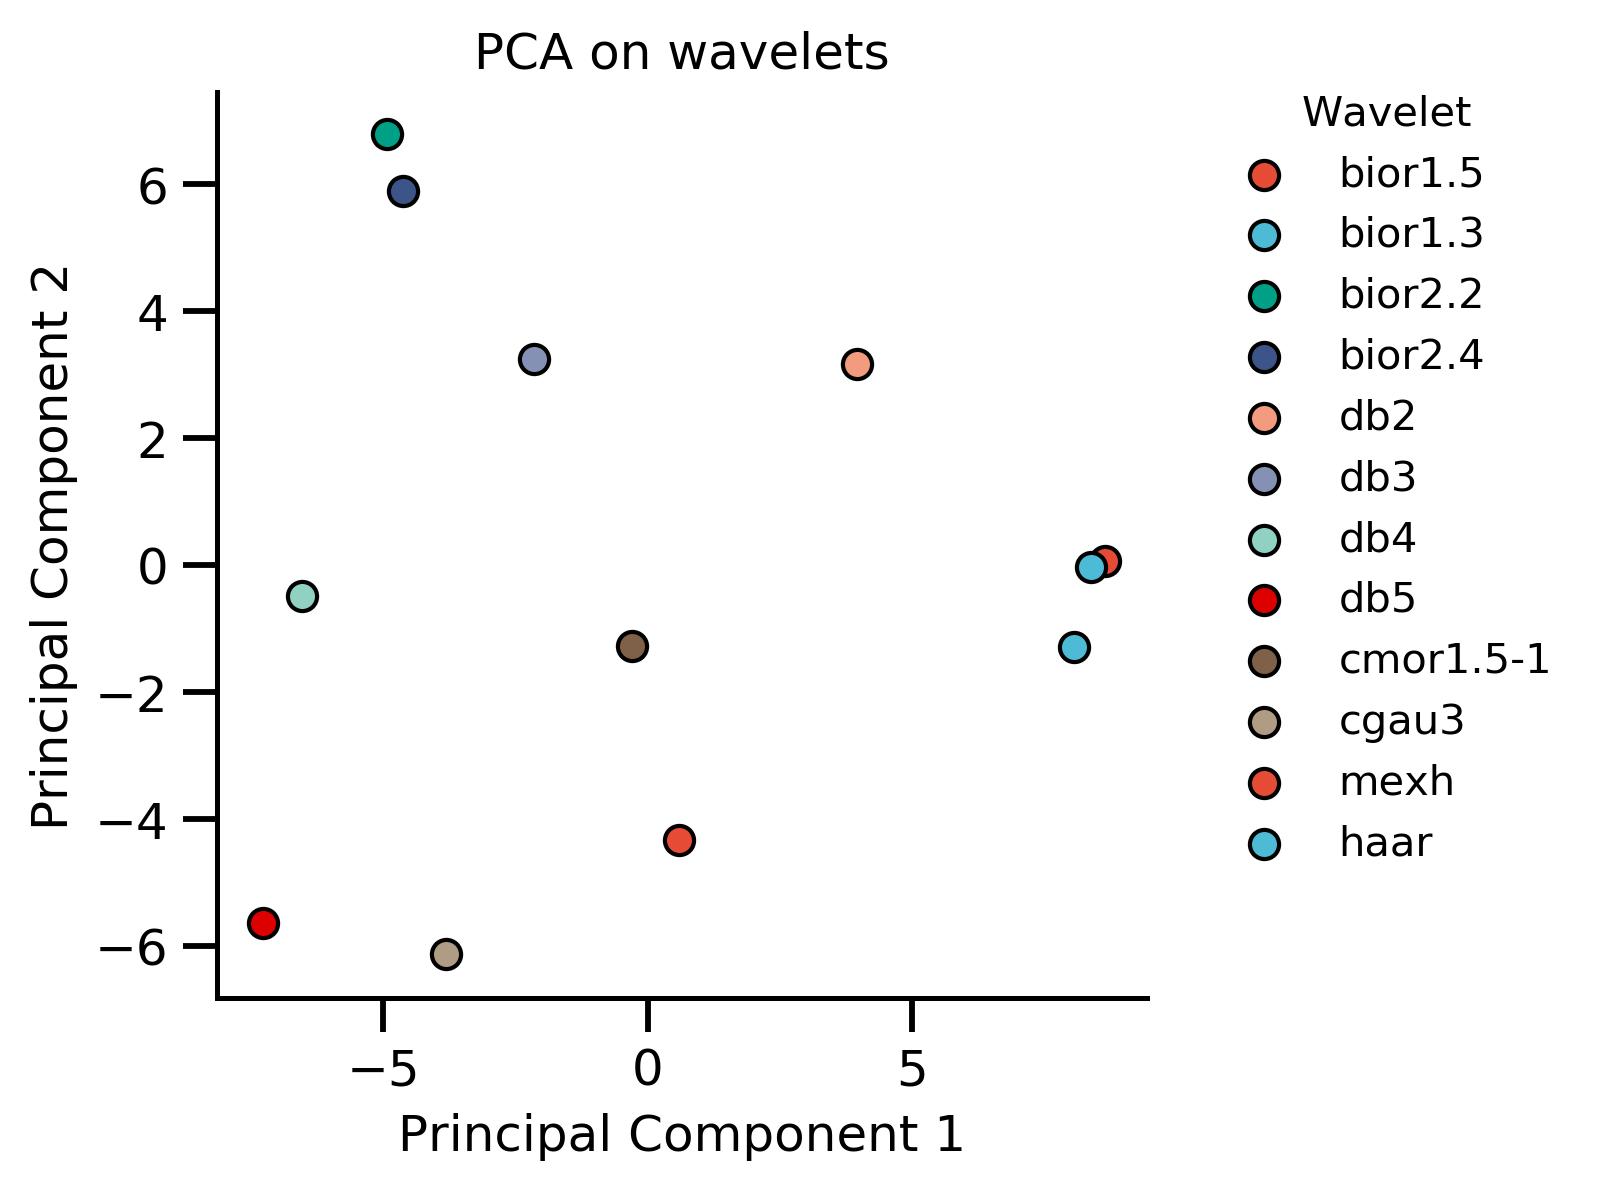

In [103]:
with plt.style.context(splstyle.get_style('nature-reviews')):
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 4)
    for n_wavelet, single_wavelet_pca in enumerate(wavelet_pca):

        ax.scatter(single_wavelet_pca[0], single_wavelet_pca[1],
                  label=wavelet_names[n_wavelet])

    ax.legend(bbox_to_anchor=(1.04, 1.04), title='Wavelet')
    ax.set_xlabel('Principal Component 1', size=12)
    ax.set_ylabel('Principal Component 2', size=12)
    ax.set_title('PCA on wavelets', size=12)
    
    
    fig_folder = '/home/timsit/mecp2/figures/multiwavelet-detection/'
    fig_name = 'wavelet_PCA.png'
    
    fig.savefig(os.path.join(fig_folder, fig_name),
           dpi=300, bbox_inches='tight')